In [1]:
import numpy as np
import math
#import pandas as pd
from scipy.stats import itemfreq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dst=np.loadtxt('salidasimubuca.dst')
dst_c=dst[(dst[:,0]>=0) & (dst[:,0]<=70)]
hst=np.loadtxt('salidasimubuca.hst')

In [3]:
print dst.max(), dst.min(), dst.mean()

912509.0 0.0 6800.77812898


In [4]:
dst_tot=dst.sum(axis=0)
#print dst_tot

In [5]:
print dst_tot[1]+dst_tot[2]+dst_tot[3]#2.61640000e+06+1.09154000e+05+1.91263000e+05

2916817.0


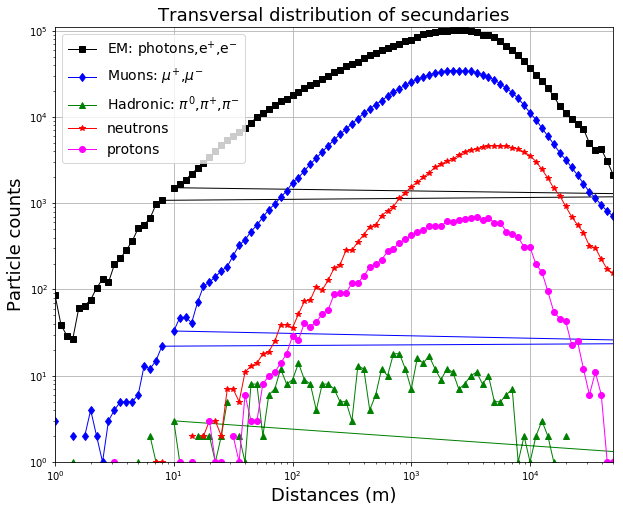

In [6]:
#salida del dst
#drawstyle='steps'
plt.figure(figsize=(10,8))
plt.loglog(dst[:,0],dst[:,1]+dst[:,2]+dst[:,3],color='black',marker='s',linestyle='solid',label=r'EM: photons,e$^{+}$,e$^{-}$',lw=1)
plt.plot(dst[:,0],dst[:,4]+dst[:,5],color='blue',marker='d',linestyle='solid',label=r'Muons: $\mu^{+}$,$\mu^{-}$',lw=1)
plt.plot(dst[:,0],dst[:,6]+dst[:,7]+dst[:,8],color='green',marker='^',linestyle='solid',label='Hadronic: $\pi^{0}$,$\pi^{+}$,$\pi^{-}$',lw=1)
plt.plot(dst[:,0],dst[:,9],color='red',marker='*',linestyle='solid',label='neutrons',lw=1)
plt.plot(dst[:,0],dst[:,10],color='magenta',marker='o',linestyle='solid',label='protons',lw=1)
plt.axis([0, 50000, 0, 110000])
plt.xlabel('Distances (m)', fontsize=18)
plt.ylabel('Particle counts', fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.title("Transversal distribution of secundaries", fontsize=18)
plt.grid()
#plt.savefig('countsdistances.png', dpi = 300)
plt.show()

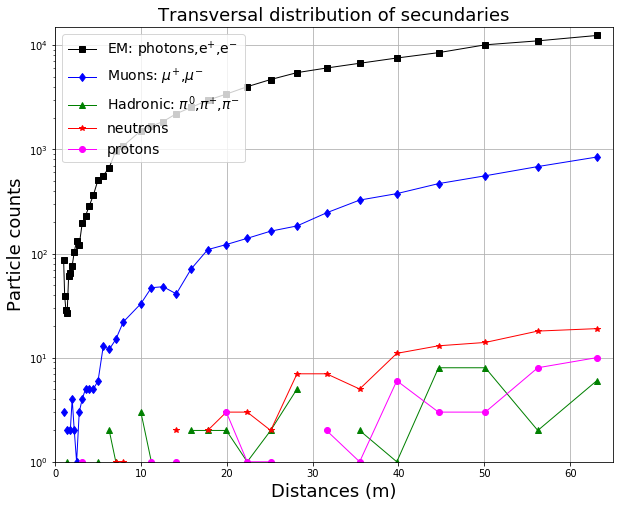

In [7]:
#salida del dst en el rango (0,60)
#drawstyle='steps'
plt.figure(figsize=(10,8))
plt.semilogy(dst_c[:,0],dst_c[:,1]+dst_c[:,2]+dst_c[:,3],color='black',marker='s',linestyle='solid',label=r'EM: photons,e$^{+}$,e$^{-}$',lw=1)
plt.plot(dst_c[:,0],dst_c[:,4]+dst_c[:,5],color='blue',marker='d',linestyle='solid',label=r'Muons: $\mu^{+}$,$\mu^{-}$',lw=1)
plt.plot(dst_c[:,0],dst_c[:,6]+dst_c[:,7]+dst_c[:,8],color='green',marker='^',linestyle='solid',label='Hadronic: $\pi^{0}$,$\pi^{+}$,$\pi^{-}$',lw=1)
plt.plot(dst_c[:,0],dst_c[:,9],color='red',marker='*',linestyle='solid',label='neutrons',lw=1)
plt.plot(dst_c[:,0],dst_c[:,10],color='magenta',marker='o',linestyle='solid',label='protons',lw=1)
plt.axis([0, 65, 0, 15000])
plt.xlabel('Distances (m)', fontsize=18)
plt.ylabel('Particle counts', fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.title("Transversal distribution of secundaries", fontsize=18)
plt.grid()
#plt.savefig('countsdistances_c.png', dpi = 300)
plt.show()

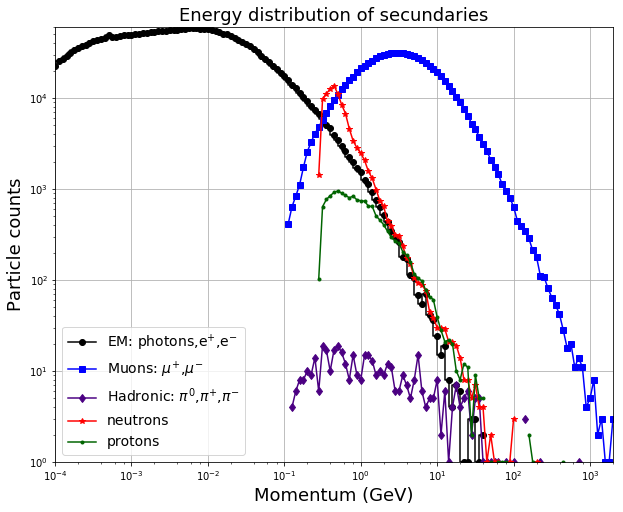

In [8]:
# Salida del hst
#drawstyle='steps'
plt.figure(figsize=(10,8))
plt.loglog(hst[:,0],hst[:,1]+hst[:,2]+hst[:,3],color='black',drawstyle='steps',marker='o',linestyle='solid',label=r'EM: photons,e$^{+}$,e$^{-}$',lw=1.5)
plt.plot(hst[:,0],hst[:,4]+hst[:,5],color='blue',marker='s',linestyle='solid',label=r'Muons: $\mu^{+}$,$\mu^{-}$',lw=1.5)
plt.plot(hst[:,0],hst[:,6]+hst[:,7]+hst[:,8],color='indigo',marker='d',linestyle='solid',label='Hadronic: $\pi^{0}$,$\pi^{+}$,$\pi^{-}$',lw=1.5)
plt.plot(hst[:,0],hst[:,9],color='red',marker='*',linestyle='solid',label='neutrons',lw=1.5)
plt.plot(hst[:,0],hst[:,10],color='darkgreen',marker='.',linestyle='solid',label='protons',lw=1.5)
plt.axis([1E-4, 2000, 0, 60000])
plt.xlabel('Momentum (GeV)', fontsize=18)
plt.ylabel('Particle counts', fontsize=18)
plt.legend(loc='lower left', fontsize=14)
plt.title("Energy distribution of secundaries", fontsize=18)
plt.grid()
#plt.savefig('countsenergies.png', dpi = 300)
plt.show()

In [9]:
!ls *.out

electrons.out	gammas.out  muones.out	neutrons.out  positrons.out  total.out
emasemenos.out	hadron.out  neupro.out	pions.out     protons.out


In [10]:
muones=np.loadtxt('muones.out')
emasemenos=np.loadtxt('emasemenos.out')
gammas=np.loadtxt('gammas.out')
neupro=np.loadtxt('neupro.out')
neutrons=np.loadtxt('neutrons.out')
protons=np.loadtxt('protons.out')
hadron=np.loadtxt('hadron.out')
electrons=np.loadtxt('electrons.out')
positrons=np.loadtxt('positrons.out')
totals=np.loadtxt('total.out')

In [11]:
E_totals,r_totals=totals[:,3],totals[:,4]
data_totals=np.c_[r_totals,E_totals]
data_totals = data_totals[data_totals[:,0].argsort()]
E_muones,r_muones=muones[:,3],muones[:,4]
data_muones=np.c_[r_muones,E_muones]
data_muones = data_muones[data_muones[:,0].argsort()]
E_gammas,r_gammas=gammas[:,3],gammas[:,4]
data_gammas=np.c_[r_gammas,E_gammas]
data_gammas = data_gammas[data_gammas[:,0].argsort()]
E_hadron,r_hadron=hadron[:,3],hadron[:,4]
data_hadron=np.c_[r_hadron,E_hadron]
data_hadron = data_hadron[data_hadron[:,0].argsort()]
E_electrons,r_electrons=electrons[:,3],electrons[:,4]
data_electrons=np.c_[r_electrons,E_electrons]
data_electrons = data_electrons[data_electrons[:,0].argsort()]
E_positrons,r_positrons=positrons[:,3],positrons[:,4]
data_positrons=np.c_[r_positrons,E_positrons]
data_positrons = data_positrons[data_positrons[:,0].argsort()]
E_protons,r_protons=protons[:,3],protons[:,4]
data_protons=np.c_[r_protons,E_protons]
data_protons = data_protons[data_protons[:,0].argsort()]
E_neutrons,r_neutrons=neutrons[:,3],neutrons[:,4]
data_neutrons=np.c_[r_neutrons,E_neutrons]
data_neutrons = data_neutrons[data_neutrons[:,0].argsort()]

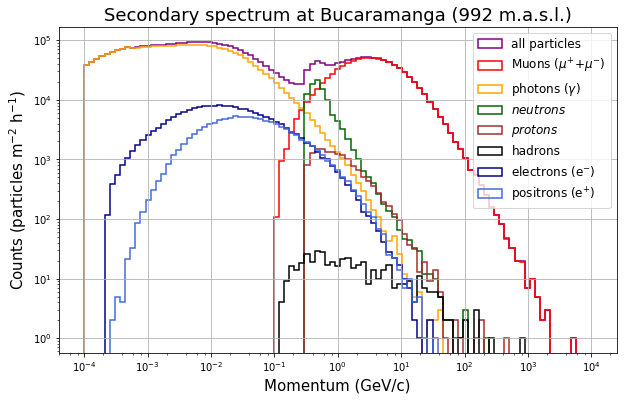

In [12]:
import matplotlib.pyplot as plt
bins=10**np.linspace(-4,4,100)
plt.figure(figsize=(10,6))
plt.hist(E_totals, bins=bins, ec='purple', lw=1.5, histtype='step', label='all particles')
plt.hist(E_muones, bins=bins, ec='red', lw=1.5, histtype='step', label='Muons ($\mu^{+}$+$\mu^{-}$)')
plt.hist(E_gammas, bins=bins, ec='orange', lw=1.5, histtype='step', label=r'photons ($\gamma$)')
plt.hist(E_neutrons, bins=bins, ec='darkgreen', lw=1.5, histtype='step', label=r'$neutrons$')
plt.hist(E_protons, bins=bins, ec='brown', lw=1.5, histtype='step', label=r'$protons$')
plt.hist(E_hadron, bins=bins, ec='black', lw=1.5, histtype='step', label='hadrons')
plt.hist(E_electrons, bins=bins, ec='darkblue', lw=1.5, histtype='step', label=r'electrons (e$^{-}}$)')
plt.hist(E_positrons, bins=bins, ec='royalblue', lw=1.5, histtype='step', label='positrons (e$^{+}}$)')
plt.title('Secondary spectrum at Bucaramanga (992 m.a.s.l.)', fontsize=18)
plt.xlabel('Momentum (GeV/c)', fontsize=15)
plt.ylabel(r'Counts (particles m$^{-2}$ h$^{-1}$)', fontsize=15)
plt.legend(loc='upper right', fontsize=12)
#plt.ylim([0,1E5])
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.savefig('countsenergies.png', dpi = 300)
plt.show()

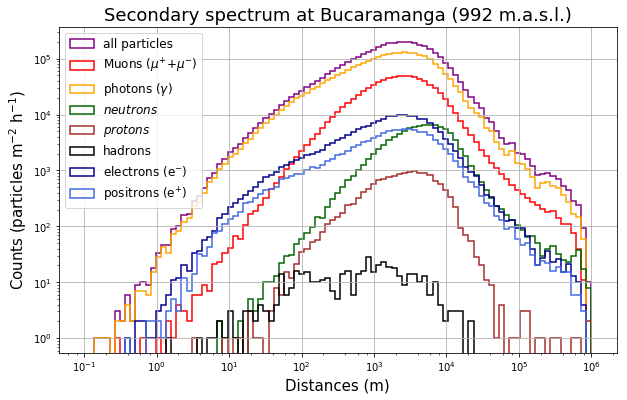

In [13]:
import matplotlib.pyplot as plt
bins=10**np.linspace(-1,6,100)
plt.figure(figsize=(10,6))
plt.hist(r_totals, bins=bins, ec='purple', lw=1.5, histtype='step', label='all particles')
plt.hist(r_muones, bins=bins, ec='red', lw=1.5, histtype='step', label='Muons ($\mu^{+}$+$\mu^{-}$)')
plt.hist(r_gammas, bins=bins, ec='orange', lw=1.5, histtype='step', label=r'photons ($\gamma$)')
plt.hist(r_neutrons, bins=bins, ec='darkgreen', lw=1.5, histtype='step', label=r'$neutrons$')
plt.hist(r_protons, bins=bins, ec='brown', lw=1.5, histtype='step', label=r'$protons$')
plt.hist(r_hadron, bins=bins, ec='black', lw=1.5, histtype='step', label='hadrons')
plt.hist(r_electrons, bins=bins, ec='darkblue', lw=1.5, histtype='step', label=r'electrons (e$^{-}}$)')
plt.hist(r_positrons, bins=bins, ec='royalblue', lw=1.5, histtype='step', label='positrons (e$^{+}}$)')
plt.title('Secondary spectrum at Bucaramanga (992 m.a.s.l.)', fontsize=18)
plt.xlabel('Distances (m)', fontsize=15)
plt.ylabel(r'Counts (particles m$^{-2}$ h$^{-1}$)', fontsize=15)
plt.legend(loc='upper left', fontsize=12)
#plt.ylim([0,1E5])
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.savefig('countsdistances.png', dpi = 300)
plt.show()

In [14]:
E_totals,r_totals=np.sort(totals[:,3].astype(int)),np.sort(totals[:,4].astype(int))
E_muones,r_muones=np.sort(np.round(muones[:,3])),np.sort(np.round(muones[:,4]))
E_gammas,r_gammas=np.sort(np.round(gammas[:,3])),np.sort(np.round(gammas[:,4]))
E_hadron,r_hadron=np.sort(np.round(hadron[:,3])),np.sort(np.round(hadron[:,4]))
E_electrons,r_electrons=np.sort(np.round(electrons[:,3])),np.sort(np.round(electrons[:,4]))
E_positrons,r_positrons=np.sort(np.round(positrons[:,3])),np.sort(np.round(positrons[:,4]))
E_protons,r_protons=np.sort(np.round(protons[:,3])),np.sort(np.round(protons[:,4]))
E_neutrons,r_neutrons=np.sort(np.round(neutrons[:,3])),np.sort(np.round(neutrons[:,4]))
print E_totals

[   0    0    0 ..., 2125 2194 5062]


In [15]:
#import numpy as np
#from itertools import groupby
#NE_totals = {key:len(list(group)) for key, group in groupby(np.sort(E_totals))}

In [16]:
from scipy.stats import itemfreq
freqr_totals = itemfreq(r_totals.astype(int))
r_bin_totals = freqr_totals[:,0]
Nr_bin_totals = freqr_totals[:,1]

freqr_muones = itemfreq(r_muones.astype(int))
r_bin_muones = freqr_muones[:,0]
Nr_bin_muones = freqr_muones[:,1]

freqr_gammas = itemfreq(r_gammas.astype(int))
r_bin_gammas = freqr_gammas[:,0]
Nr_bin_gammas = freqr_gammas[:,1]

freqr_hadron = itemfreq(r_hadron.astype(int))
r_bin_hadron = freqr_hadron[:,0]
Nr_bin_hadron = freqr_hadron[:,1]

freqr_electrons = itemfreq(r_electrons.astype(int))
r_bin_electrons = freqr_electrons[:,0]
Nr_bin_electrons = freqr_electrons[:,1]

freqr_positrons = itemfreq(r_positrons.astype(int))
r_bin_positrons = freqr_positrons[:,0]
Nr_bin_positrons = freqr_positrons[:,1]

freqr_protons = itemfreq(r_protons.astype(int))
r_bin_protons = freqr_protons[:,0]
Nr_bin_protons = freqr_protons[:,1]

freqr_neutrons = itemfreq(r_neutrons.astype(int))
r_bin_neutrons = freqr_neutrons[:,0]
Nr_bin_neutrons = freqr_neutrons[:,1]

freqE_totals = itemfreq(E_totals.astype(int))
E_bin_totals = freqE_totals[:,0]
NE_bin_totals = freqE_totals[:,1]

freqE_muones = itemfreq(E_muones.astype(int))
E_bin_muones = freqE_muones[:,0]
NE_bin_muones = freqE_muones[:,1]

freqE_gammas = itemfreq(E_gammas.astype(int))
E_bin_gammas = freqE_gammas[:,0]
NE_bin_gammas = freqE_gammas[:,1]

freqE_hadron = itemfreq(E_hadron.astype(int))
E_bin_hadron = freqE_hadron[:,0]
NE_bin_hadron = freqE_hadron[:,1]

freqE_electrons = itemfreq(E_electrons.astype(int))
E_bin_electrons = freqE_electrons[:,0]
NE_bin_electrons = freqE_electrons[:,1]

freqE_positrons = itemfreq(E_positrons.astype(int))
E_bin_positrons = freqE_positrons[:,0]
NE_bin_positrons = freqE_positrons[:,1]

freqE_protons = itemfreq(E_protons.astype(int))
E_bin_protons = freqE_protons[:,0]
NE_bin_protons = freqE_protons[:,1]

freqE_neutrons = itemfreq(E_neutrons.astype(int))
E_bin_neutrons = freqE_neutrons[:,0]
NE_bin_neutrons = freqE_neutrons[:,1]

NrA_bin_totals=Nr_bin_totals/(np.pi*(r_bin_totals)**2)
NrA_bin_muones=Nr_bin_muones/(np.pi*(r_bin_muones)**2)
NrA_bin_hadron=Nr_bin_hadron/(np.pi*(r_bin_hadron)**2)
NrA_bin_electrons=Nr_bin_electrons/(np.pi*(r_bin_electrons)**2)
NrA_bin_positrons=Nr_bin_positrons/(np.pi*(r_bin_positrons)**2)
NrA_bin_protons=Nr_bin_protons/(np.pi*(r_bin_protons)**2)
NrA_bin_neutrons=Nr_bin_neutrons/(np.pi*(r_bin_neutrons)**2)
NrA_bin_gammas=Nr_bin_gammas/(np.pi*(r_bin_gammas)**2)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:66: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:67: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:69: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:70: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:73: RuntimeWarning: divide by zero encountered in divide


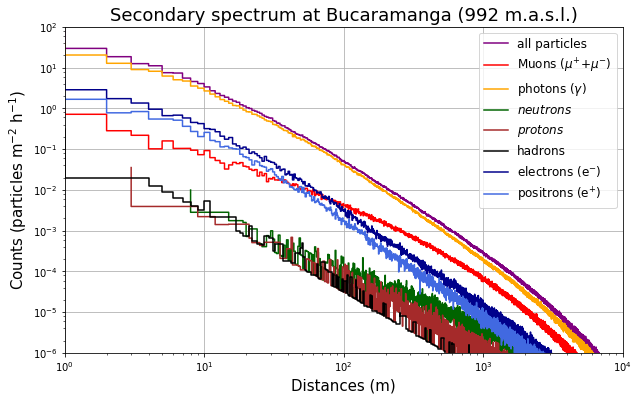

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(r_bin_totals, NrA_bin_totals, color='purple', lw=1.5, drawstyle='steps', label='all particles')
plt.plot(r_bin_muones, NrA_bin_muones, color='red', lw=1.5, drawstyle='steps', label='Muons ($\mu^{+}$+$\mu^{-}$)')
plt.plot(r_bin_gammas, NrA_bin_gammas, color='orange', lw=1.5, drawstyle='steps', label=r'photons ($\gamma$)')
plt.plot(r_bin_neutrons, NrA_bin_neutrons, color='darkgreen', lw=1.5, drawstyle='steps', label=r'$neutrons$')
plt.plot(r_bin_protons, NrA_bin_protons, color='brown', lw=1.5, drawstyle='steps', label=r'$protons$')
plt.plot(r_bin_hadron, NrA_bin_hadron, color='black', lw=1.5, drawstyle='steps', label='hadrons')
plt.plot(r_bin_electrons, NrA_bin_electrons, color='darkblue', lw=1.5, drawstyle='steps', label=r'electrons (e$^{-}}$)')
plt.plot(r_bin_positrons, NrA_bin_positrons, color='royalblue', lw=1.5, drawstyle='steps', label='positrons (e$^{+}}$)')
plt.title('Secondary spectrum at Bucaramanga (992 m.a.s.l.)', fontsize=18)
plt.xlabel('Distances (m)', fontsize=15)
plt.ylabel(r'Counts (particles m$^{-2}$ h$^{-1}$)', fontsize=15)
plt.legend(loc='upper right', fontsize=12)
plt.ylim([1e-6,1E2])
plt.xlim([1,1E4])
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.savefig('countsdistances2.png', dpi = 300)
plt.show()

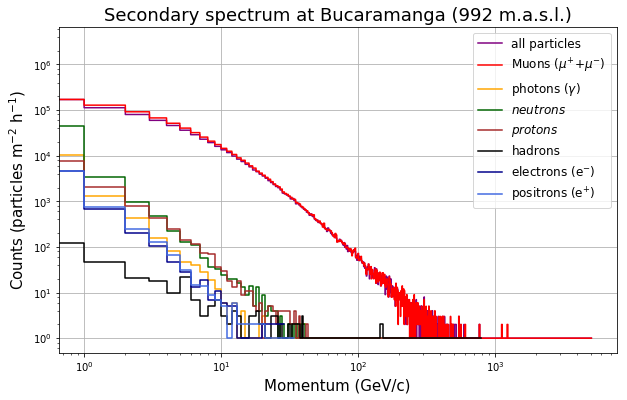

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(E_bin_totals, NE_bin_totals, color='purple', lw=1.5, drawstyle='steps', label='all particles')
plt.plot(E_bin_muones, NE_bin_muones, color='red', lw=1.5, drawstyle='steps', label='Muons ($\mu^{+}$+$\mu^{-}$)')
plt.plot(E_bin_gammas, NE_bin_gammas, color='orange', lw=1.5, drawstyle='steps', label=r'photons ($\gamma$)')
plt.plot(E_bin_neutrons, NE_bin_neutrons, color='darkgreen', lw=1.5, drawstyle='steps', label=r'$neutrons$')
plt.plot(E_bin_protons, NE_bin_protons, color='brown', lw=1.5, drawstyle='steps', label=r'$protons$')
plt.plot(E_bin_hadron, NE_bin_hadron, color='black', lw=1.5, drawstyle='steps', label='hadrons')
plt.plot(E_bin_electrons, NE_bin_electrons, color='darkblue', lw=1.5, drawstyle='steps', label=r'electrons (e$^{-}}$)')
plt.plot(E_bin_positrons, NE_bin_positrons, color='royalblue', lw=1.5, drawstyle='steps', label='positrons (e$^{+}}$)')
plt.title('Secondary spectrum at Bucaramanga (992 m.a.s.l.)', fontsize=18)
plt.xlabel('Momentum (GeV/c)', fontsize=15)
plt.ylabel(r'Counts (particles m$^{-2}$ h$^{-1}$)', fontsize=15)
plt.legend(loc='upper right', fontsize=12)
#plt.ylim([0,1E5])
#plt.xlim([0,1E5])
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.savefig('countsenergies2.png', dpi = 300)
plt.show()

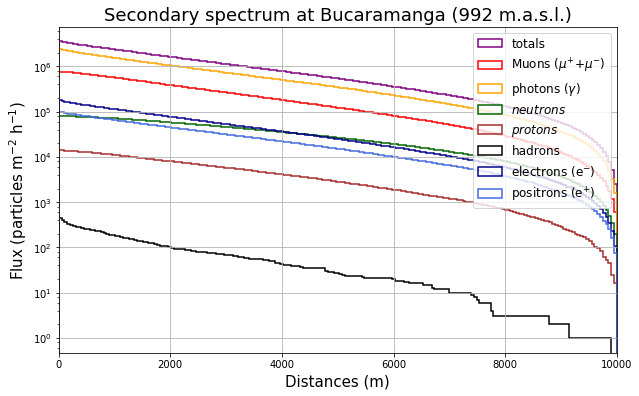

In [19]:
import matplotlib.pyplot as plt
#bins=10**np.linspace(0,3.5,1E3)
#bins=np.logspace(0,3.5,1E3)
bins=np.linspace(1,10000,200)
plt.figure(figsize=(10,6))
#H,X1 = np.histogram(r_totals, bins = bins)
#dx = X1[1] - X1[0]
#F1 = np.cumsum(H)*dx
#plt.step(X1[1:], F1)
plt.hist(r_totals, bins=bins, ec='purple', lw=1.5, histtype='step', label='totals',cumulative=-1)
plt.hist(r_muones, bins=bins, ec='red', lw=1.5, histtype='step', label='Muons ($\mu^{+}$+$\mu^{-}$)',cumulative=-1)
plt.hist(r_gammas, bins=bins, ec='orange', lw=1.5, histtype='step', label=r'photons ($\gamma$)',cumulative=-1)
plt.hist(r_neutrons, bins=bins, ec='darkgreen', lw=1.5, histtype='step', label=r'$neutrons$',cumulative=-1)
plt.hist(r_protons, bins=bins, ec='brown', lw=1.5, histtype='step', label=r'$protons$',cumulative=-1)
plt.hist(r_hadron, bins=bins, ec='black', lw=1.5, histtype='step', label='hadrons',cumulative=-1)
plt.hist(r_electrons, bins=bins, ec='darkblue', lw=1.5, histtype='step', label=r'electrons (e$^{-}}$)',cumulative=-1)
plt.hist(r_positrons, bins=bins, ec='royalblue', lw=1.5, histtype='step', label='positrons (e$^{+}}$)',cumulative=-1)
plt.title('Secondary spectrum at Bucaramanga (992 m.a.s.l.)', fontsize=18)
plt.xlabel('Distances (m)', fontsize=15)
plt.ylabel(r'Flux (particles m$^{-2}$ h$^{-1}$)', fontsize=15)
plt.legend(loc='upper right', fontsize=12)
#plt.ylim([0,1E5])
plt.xlim([1,1E4])
#plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

In [20]:
kk=np.loadtxt('kk.dat')
kk_gammas=np.loadtxt('kk_gammas.dat')
kk_electrones=np.loadtxt('kk_electrones.dat')
kk_positrones=np.loadtxt('kk_positrones.dat')
kk_muones=np.loadtxt('kk_muones.dat')
kk_hadrones=np.loadtxt('kk_hadrones.dat')
kk_neutrones=np.loadtxt('kk_neutrones.dat')
kk_protones=np.loadtxt('kk_protones.dat')

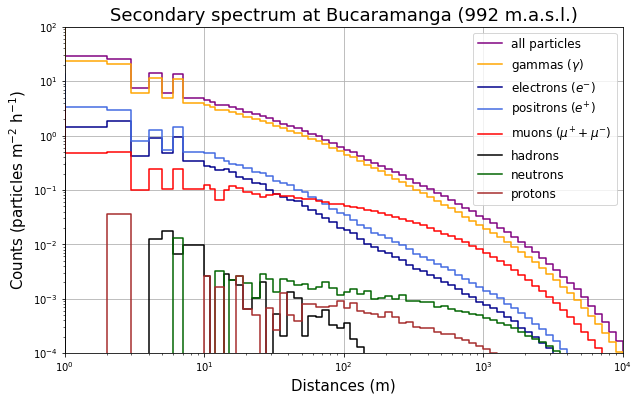

In [22]:
uno=kk[:,0]
dos=kk[:,1]
uno_g=kk_gammas[:,0]
dos_g=kk_gammas[:,1]
uno_e=kk_electrones[:,0]
dos_e=kk_electrones[:,1]
uno_p=kk_positrones[:,0]
dos_p=kk_positrones[:,1]
uno_m=kk_muones[:,0]
dos_m=kk_muones[:,1]
uno_h=kk_hadrones[:,0]
dos_h=kk_hadrones[:,1]
uno_n=kk_neutrones[:,0]
dos_n=kk_neutrones[:,1]
uno_pr=kk_protones[:,0]
dos_pr=kk_protones[:,1]
plt.figure(figsize=(10,6))
plt.plot(uno,dos,drawstyle='steps',color='purple',label='all particles')
plt.plot(uno_g,dos_g,drawstyle='steps',color='orange',label=r'gammas ($\gamma$)')
plt.plot(uno_e,dos_e,drawstyle='steps',color='darkblue',label=r'electrons ($e^{-}$)')
plt.plot(uno_p,dos_p,drawstyle='steps',color='royalblue',label=r'positrons ($e^{+}$)')
plt.plot(uno_m,dos_m,drawstyle='steps',color='red',label=r'muons ($\mu^{+}+\mu^{-}$)')
plt.plot(uno_h,dos_h,drawstyle='steps',color='black',label='hadrons')
plt.plot(uno_n,dos_n,drawstyle='steps',color='darkgreen',label='neutrons')
plt.plot(uno_pr,dos_pr,drawstyle='steps',color='brown',label='protons')
plt.title('Secondary spectrum at Bucaramanga (992 m.a.s.l.)', fontsize=18)
plt.xlabel('Distances (m)', fontsize=15)
plt.ylabel(r'Counts (particles m$^{-2}$ h$^{-1}$)', fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right', fontsize=12)
plt.ylim([1e-4,1E2])
plt.xlim([1,1E4])
plt.grid()
plt.savefig('countsdistances3.png', dpi = 300)
plt.show()